In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env_hard as solitaire_env_hard
import sys
import seaborn as sns
import pickle as pkl
import gp
import tqdm.notebook as tq
#sys.setrecursionlimit(10**6)

In [3]:
with open("games/run_hardgame_2020-05-29 16:34:22.929941.pkl","rb") as file:
    run_data = pkl.load(file)

In [4]:
actions_matrix = run_data['actions_matrix']

In [5]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

## Maximum number of steps completed for any game

In [6]:
max_action_take = max(it.index)
max_action_take 

850

## Game that resulted into victory with smallest number of steps

In [7]:
smallest_steps = 20000
smallest_action_seq = None
smallest_gno = None
for game,actions,end_state,start_state,game_states,reason,ad in actions_matrix:
    if reason =='won' and len(actions)<smallest_steps:
        smallest_gno = game
        smallest_steps = len(actions)
        smallest_action_seq = actions
smallest_gno,smallest_steps

(340, 67)

### Smallest Action Sequence for a Win

In [8]:
"".join([str(x) for x in smallest_action_seq])

'1001111101231131323100000131111120221122310031111011120111111111111'

In [9]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for x in smallest_action_seq:
    action_freq[x]+=1
    
action_freq

{0: 13, 1: 39, 2: 8, 3: 7, 4: 0, 5: 0}

## Game that resulted into victory with maximum number of steps

In [10]:
longest_steps = 0
longest_action_seq = None
longest_gno = None
longest_start_state = None
for game,actions,end_state,start_state,game_states,reason,ad in actions_matrix:
    if reason =='won' and len(actions)>longest_steps:
        longest_gno = game
        longest_steps = len(actions)
        longest_action_seq = actions
        longest_start_state = start_state
longest_gno,longest_steps

(120, 542)

### Longest Action Sequence for a Win

In [11]:
"".join([str(x) for x in longest_action_seq])

'01122233113332011322333355222525555553255515133113244441114214445111233332441441144411451114441144415111444511544511514441511444511144511444511544511144511444511144511444511144511444511144511444511144414451114441511114441511444411444511111444415111444151144441151144441151144415114441445151114444411151144414414451511114444115114441444115111445114444114445111114441511244144411444511111444411514441445111144415114444114451114441511444511145144144151144441151514451144441151551445114444115114451133451111111011110111111111111111111111111111111'

In [12]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for x in longest_action_seq:
    action_freq[x]+=1
    
action_freq

{0: 4, 1: 239, 2: 16, 3: 20, 4: 191, 5: 72}

## Replay games that were won

In [13]:
games_won_start_state = []
for game,actions,end_state,start_state,game_states,reason,ad in actions_matrix:
    if reason =='won':
        games_won_start_state.append(start_state)
number_of_wins =  len(games_won_start_state)      
print(number_of_wins)

335


In [14]:
win_actions_matrix = [[] for _ in range(number_of_wins)]

count = 0

for i in tq.tqdm(range(number_of_wins)):
    
    game_start_state = games_won_start_state[i]
    env = solitaire_env_hard.env()
    
    env.state = game_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=win_actions_matrix,fp_flag=True)
    
    if won == True:
        count+=1
        
print(count)
        

/nfs/hpc/share/bhattpa/anaconda3/envs/Solitaire/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  """



176


### Percentage of Re-wins

In [15]:
count*100/number_of_wins

52.53731343283582

## Replay games that were Lost

In [16]:
games_lost_start_state = []
reasons = {}
for game,actions,end_state,start_state,game_states,reason,ad in actions_matrix:
    if reason !='won':
        if reason not in reasons:
            reasons[reason] = 0
            
        reasons[reason]+=1
        games_lost_start_state.append(start_state)
number_of_losses =  len(games_lost_start_state)      
print(number_of_losses)
print(reasons)

665
{'No action could be taken': 665}


In [17]:
lost_actions_matrix = [[] for _ in range(number_of_losses)]

count = 0

for i in tq.tqdm(range(number_of_losses)):
    
    game_start_state = games_lost_start_state[i]
    env = solitaire_env_hard.env()
    
    env.state = game_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=lost_actions_matrix,fp_flag=True)
    
    if won == True:
        count+=1
        
print(count)
        


157


### Wins after Retry

In [18]:
count*100/number_of_losses

23.60902255639098

### Retry won Game with Longest sequence of actions

In [19]:
retry_output = []
number_of_retries = 20
retry_actions_matrix = [[] for _ in range(number_of_retries)]

for i in tq.tqdm(range(number_of_retries)):
    env = solitaire_env_hard.env()
    env.state = longest_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=retry_actions_matrix,fp_flag=True)
    
    retry_output.append(int(won))

In [20]:
print(sum(retry_output))

9


### Retry Lost Game with Longest sequence of actions

In [21]:
longest_steps_for_loss = 0
longest_action_seq_for_loss = None
longest_gno_for_loss = None
longest_start_state_for_loss = None
for game,actions,end_state,start_state,game_states,reason,ad in actions_matrix:
    if reason !='won' and len(actions)>longest_steps_for_loss:
        longest_gno_for_loss = game
        longest_steps_for_loss = len(actions)
        longest_action_seq_for_loss = actions
        longest_start_state_for_loss = start_state
longest_gno_for_loss,longest_steps_for_loss

(982, 850)

In [22]:
retry_output = []
number_of_retries = 100
retry_actions_matrix = [[] for _ in range(number_of_retries)]

for i in tq.tqdm(range(number_of_retries)):
    env = solitaire_env_hard.env()
    env.state = longest_start_state_for_loss
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=retry_actions_matrix,fp_flag=True)
    
    retry_output.append(int(won))
    
print(sum(retry_output))


72


### Retry Every Game Game X number of times

In [23]:
import tqdm
def replay_each_game(actions_matrix = None,max_steps=100):

    results_for_each_game = [[] for _ in range(len(actions_matrix))]

    for k  in tqdm.tqdm(range(len(actions_matrix))):

        game,actions,end_state,start_state,game_states,reason,ad = actions_matrix[k]

        not_won = True

        i = 0
        game_actions_matrix = [[] for _ in range(max_steps)]
        while not_won and i<max_steps:

            env = solitaire_env_hard.env()
            env.state = start_state
            action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}

            _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=game_actions_matrix,fp_flag=True)

            results_for_each_game[k].append(won)
            not_won = (won == False)
            i+=1
       
    
    times_tried = [len(x) for x in results_for_each_game]
    games_won = [x for x in times_tried if x<max_steps-1]
    print("games won",len(games_won))
    sns.lineplot(x=range(len(times_tried)),y=times_tried)
    
    return results_for_each_game
    

/nfs/hpc/share/bhattpa/anaconda3/envs/Solitaire/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  
100%|██████████| 500/500 [03:59<00:00,  2.09it/s]


games won 438


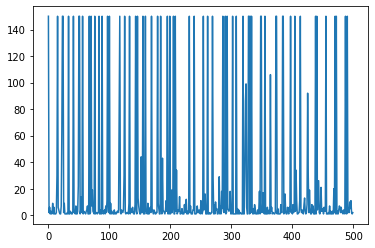

In [24]:
res = replay_each_game(actions_matrix[:500],max_steps=150)


100%|██████████| 500/500 [03:28<00:00,  2.40it/s]

games won 442


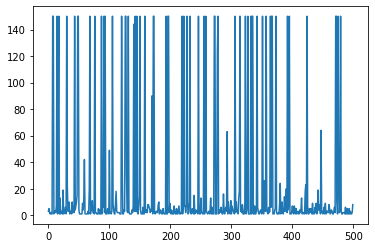

In [25]:
res = replay_each_game(actions_matrix[500:],max_steps=150)

### Replay a particular game

In [22]:
class replay_game:
    
    def __init__(self,gno=0):
        
        self.temp_en = solitaire_env_hard.env()
        self.action_number = 0
        action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }
    
        for game_no,action_seq,end_state,start_state,state_seq,how_ends,ad in actions_matrix:
            if game_no == gno:
                break;
        print("Reason game ended...   ",how_ends)
        print("Length of action sequence is.. ",len(action_seq))
        action_replay = "".join([str(x) for x in action_seq])
        
        self.action_replay = [int(x) for x in action_replay]
        
        self.temp_en.state = start_state
        self.start_state = start_state
        
        self.end_state = end_state
        
        
        self.temp_en.state = self.temp_en.copy_state()
        
        self.state_seq = state_seq
        
        self.action_seq = [action_type[int(x)] for x in action_replay]
        
        print("starting state.. \n")
        
        print("***********************************pile*****************************************")
        self.temp_en.get_pile()
        print("\n\n\n\n\n\n\n\n")
        print("*****************************foundation*****************************************")
        
        self.temp_en.get_foundation()
        print("\n\n\n\n\n\n\n\n")
        print("******************************tableau*******************************************")
        
        self.temp_en.get_tableau()
        print("\n\n\n\n\n\n\n\n")
        
    def next_state(self):
        
        print("action number..  ", self.action_number)
        
        print("action taken {} : description {} ".format(self.action_replay[self.action_number],self.action_seq[self.action_number]))
        self.action_number +=1
        self.temp_en = solitaire_env_hard.env()
        
        self.temp_en.state = self.state_seq[self.action_number]
        
        self.temp_en.state = self.temp_en.copy_state()
        
        print("starting state.. \n")
        
        print("***********************************pile*****************************************")
        self.temp_en.get_pile()
        print("\n\n\n\n\n\n\n\n")
        
        
        print("*****************************foundation*****************************************")
        
        self.temp_en.get_foundation()
        print("\n\n\n\n\n\n\n\n")
            
            
        print("******************************tableau*******************************************")
        
        self.temp_en.get_tableau()
        print("\n\n\n\n\n\n\n\n")
        
        
        
        
    def goto_state(self,n):
        self.action_number = n

In [30]:
game_replay = replay_game(gno = 23)

Reason game ended...    won
Length of action sequence is..  172
starting state.. 

***********************************pile*****************************************
position    0 suit = club       color = black      number =     2 speciality = None       face = up   
position    1 suit = club       color = black      number =     3 speciality = None       face = up   
position    2 suit = heart      color = red        number =     6 speciality = None       face = up   
position    3 suit = club       color = black      number =     4 speciality = None       face = up   
position    4 suit = club       color = black      number =     7 speciality = None       face = up   
position    5 suit = heart      color = red        number =     7 speciality = None       face = up   
position    6 suit = spade      color = black      number =     4 speciality = None       face = up   
position    7 suit = spade      color = black      number =    10 speciality = None       face = up   
position    

In [50]:
#game_replay.goto_state(5)
game_replay.next_state()
#foundation progression

action number..   5
action taken 2 : description tableau_to_tableau_reveal 
starting state.. 

***********************************pile*****************************************
position    0 suit = club       color = black      number =     2 speciality = None       face = up   
position    1 suit = club       color = black      number =     3 speciality = None       face = up   
position    2 suit = heart      color = red        number =     6 speciality = None       face = up   
position    3 suit = club       color = black      number =     4 speciality = None       face = up   
position    4 suit = club       color = black      number =     7 speciality = None       face = up   
position    5 suit = heart      color = red        number =     7 speciality = None       face = up   
position    6 suit = spade      color = black      number =     4 speciality = None       face = up   
position    7 suit = spade      color = black      number =    10 speciality = None       face = up   


In [25]:
game_replay.next_state()

action number..   30
action taken 4 : description foundation_to_tableau 
starting state.. 

***********************************pile*****************************************
position    0 suit = club       color = black      number =    11 speciality = JACK       face = up   
position    1 suit = diamond    color = red        number =    13 speciality = KING       face = up   
position    2 suit = club       color = black      number =    13 speciality = KING       face = up   
position    3 suit = heart      color = red        number =    13 speciality = KING       face = up   
position    4 suit = spade      color = black      number =     2 speciality = None       face = up   
position    5 suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
position    6 suit = heart      color = red        number =     4 speciality = None       face = up   









*****************************foundation*****************************************
printing foundat

In [29]:
# Tableau to foundation reveal #gamestate

In [13]:
temp_en = solitaire_env_hard.env()

temp_en.state = game_replay.temp_en.state

In [14]:
temp_en.get_pile()

position    0 suit = heart      color = red        number =    13 speciality = KING       face = up   
position    1 suit = diamond    color = red        number =     2 speciality = None       face = up   
position    2 suit = diamond    color = red        number =    13 speciality = KING       face = up   
position    3 suit = spade      color = black      number =     7 speciality = None       face = up   
position    4 suit = heart      color = red        number =     3 speciality = None       face = up   
position    5 suit = club       color = black      number =     4 speciality = None       face = up   
position    6 suit = spade      color = black      number =    13 speciality = KING       face = up   
position    7 suit = club       color = black      number =     5 speciality = None       face = up   
position    8 suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
position    9 suit = club       color = black      number =    12 special

In [15]:
temp_en.get_foundation()
print("********************************************************************************************************")
temp_en.get_tableau()

printing foundation number 1 ********************
position    0 suit = club       color = black      number =     1 speciality = ACE        face = up   
position    1 suit = club       color = black      number =     2 speciality = None       face = up   
printing foundation number 2 ********************
position    0 suit = heart      color = red        number =     1 speciality = ACE        face = up   
printing foundation number 3 ********************
printing foundation number 4 ********************
position    0 suit = spade      color = black      number =     1 speciality = ACE        face = up   
position    1 suit = spade      color = black      number =     2 speciality = None       face = up   
********************************************************************************************************
printing tableau number 1 ********************
position    0 suit = heart      color = red        number =    10 speciality = None       face = up   
printing tableau number 2 ****

In [16]:
w,t = temp_en.step(5,debug=True,fp_flag=True)

Debug is True
cards movable in tableau 0 
 [0]
cards movable in tableau 1 
 [0, 1, 2, 3, 4, 5]
cards movable in tableau 2 
 [1]
cards movable in tableau 3 
 [0]
cards movable in tableau 4 
 [4, 5, 6, 7, 8, 9, 10, 11]
cards movable in tableau 5 
 [3, 4]
cards movable in tableau 6 
 [5]
True False
False True
True False
True False
True False
False False
False True
False False
True False
True False
True True
False False
True False
True False
False False
False False
False False
True False
False False
False False
True False
True False
True False
False False
True False
True False
False False
False False
False False
True False
False False
False False
True True
True False
True False
False False
True False
True False
False False
False False
False False
True False
False False
True False
True False
True False
True False
False True
True False
False False
True False
False False
False False
True False
False False
True False
False True
True False
True False
False False
True True
False False
True False

In [65]:
w,t

(False, False)

In [35]:
#foundation progression is not correct

In [36]:
#
#l = [1,2,3]

In [37]:
#l[:0]

## Action Types

## 1. Tableau to Foundation Reveal   
from_tableau_number   
to_foundation_number   
moved card

## 2. To Foundation Stack
Type pile:   
from_pile_position    
to_foundation_number     
moved card     
     
Type tableau:   
from_tableau_number    
to_foundation_number     
moved_card    

## 3. Tableau To Tableau Reveal
from_tableau_number    
to_tableau_number     
from_tableau_position     
card_stack_moved     

## 4. Pile to Tableau     

from_pile_position    
to_tableau_number    
moved_card     

## 5. Foundation to Tableau
from_foundation_number    
to_tableau_number     
moved_card      

## 6. Tableau to Tableau Reveal
from_tableau_number   
to_tableau_number    
from_tableau_position    
card_stack_moved     